# Introduction to Data Science
## Homework 5

Student Name: Connor Concannon 

Student Netid: cmc1204

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

The Laplace smoothing technique is especially useful (if not critical) to use in text mining because of the large number of possible words (or n-grams) that may never be encountered in the training set.  If a new word is passed through the algorithm without applying Laplace smoothing, the algorithm may incorrectly set the probability of the outcome to zero, even if the evidence suggests otherwise.  The existence of a new word may throw off the prediction, and so the smoothing transformation will help prevent against that.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('imdb.csv')
import os
os.getcwd()
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [5]:
# Code here
data.Class = pd.DataFrame(np.where(data.Class=='P',1,0))
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [24]:
from sklearn.cross_validation import train_test_split

X = data.Text
Y = data.Class

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.25, random_state=13)

X_train.head()

2326    'Man To Man tries hard to be a good movie: it ...
2589    'This film has some of the greatest comedic di...
4053    'Busy is so amazing! I just loved every word s...
2046    'Thats right you heard me this movie is a frea...
52      'This wonderful 1983 BBC television production...
Name: Text, dtype: object

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


binary = CountVectorizer(ngram_range=(1,2),stop_words='english')
binary.fit(X_train)
X_train_count = binary.transform(X_train)
X_test_count = binary.transform(X_test)
#print(binary.get_feature_names()[-50:])

tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words='english')
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

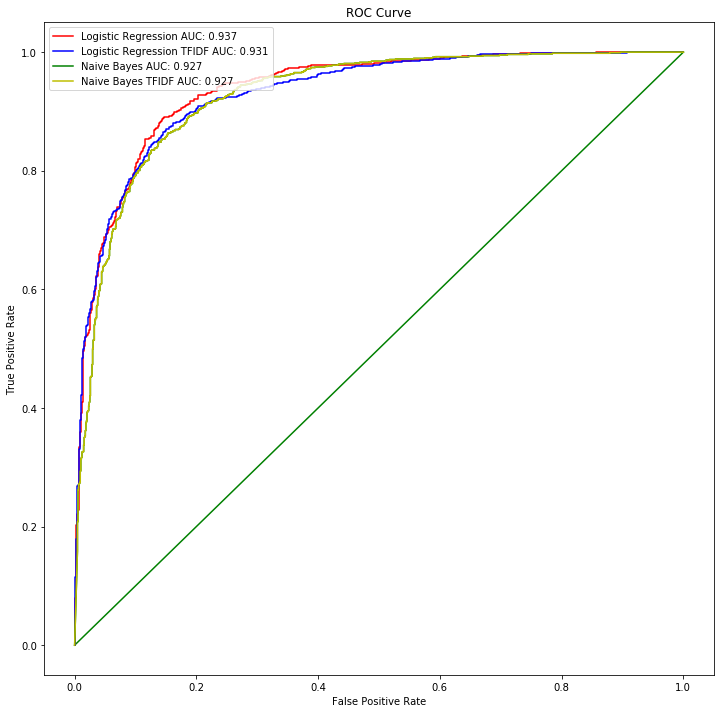

In [8]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# Logistic Count Vectorizer
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train_count, Y_train)
logistic_score = logistic_clf.predict_proba(X_test_count)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, logistic_score[:,1])
auc_log = metrics.auc(fpr,tpr)
auc_log

#Logistic TFIDF
logistic_tf = LogisticRegression()
logistic_tf.fit(X_train_tfidf, Y_train)
logistic_tf_score = logistic_tf.predict_proba(X_test_tfidf)
fprtf, tprtf, thresholdstf = metrics.roc_curve(Y_test, logistic_tf_score[:,1])
auc_log_tf = metrics.auc(fprtf,tprtf)
auc_log_tf


#NB Count Vectorizer
nb_count = BernoulliNB()
nb_count.fit(X_train_count, Y_train)
nb_count_score = nb_count.predict_proba(X_test_count)
fprnb, tprnb, thresholdsnb = metrics.roc_curve(Y_test, nb_count_score[:,1])
auc_nb = metrics.auc(fprnb, tprnb)
auc_nb

#NB TFIDF
nb_tf = BernoulliNB()
nb_tf.fit(X_train_tfidf, Y_train)
nb_tf_score = nb_tf.predict_proba(X_test_tfidf)
fprnbtf, tprnbtf, thresholdsnbtf = metrics.roc_curve(Y_test, nb_tf_score[:,1])
auc_nbtf = metrics.auc(fprnbtf,tprnbtf)
auc_nbtf



plt.plot([0, 1], [0, 1], 'g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr, tpr, color='r', label= ('Logistic Regression AUC: {}'.format(round(auc_log,3))))
plt.plot(fprtf, tprtf, color='b', label=('Logistic Regression TFIDF AUC: {}'.format(round(auc_log_tf,3))))
plt.plot(fprnb, tprnb, color='g', label=('Naive Bayes AUC: {}'.format(round(auc_nb,3))))
plt.plot(fprnbtf, tprnbtf, color='y', label=('Naive Bayes TFIDF AUC: {}'.format(round(auc_nbtf,3))))
plt.legend(loc ='upper left')
plt.show()


According to the AUC value, the logistic regression model created with CountVectcorizer() technique performs the best.  In addition to the AUC, this model is probably the best because it is more interpretable (to the lay person) than the TF-IDF technique.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [33]:
clf = LogisticRegression()
clf.fit(X_train_count,Y_train)
Y_pred = clf.predict(X_test_count)

misclassified = (Y_pred != Y_test)

DF = pd.DataFrame(
    {'X_Test': list(X_test[misclassified]),
     'Y_Test': list(Y_test[misclassified])
    })
pd.set_option('display.max_colwidth', -1)
DF[DF["Y_Test"] == 1 ].head(5)

,X_Test,Y_Test
0,'Ive heard people who say this movie is dull dull dull. I dont think they were watching the right movie. This isnt the prototypical action movie thank God. This is a psychological drama about the rookie and his mentor that just happens to be about killing people. In this way it works extremely well with terrific performances from Berenger and Zane (who doesnt sleepwalk through the movie like he has in other roles - he actually looks like hes acting). I was disappointed with the action towards the end - a lot of it didnt make much sense and was unsatisfying given the buildup from the rest of the movie. But watch Zanes face as he panics alone while Berenger does the dirty work.',1
2,'all i have to say is if you dont like it then there is something wrong with you. plus Jessica is just all kinds of hot!!!!! the only reason you may not like it is because it is set in the future where Seattle has gone to hell. that and you my not like it cause the future they show could very well happen.',1
4,'Cinematography--Compared to The Wrestler a degree of verite and cinematic skill that disarms the viewer and then hypnotizes as well. Acting--The dialogue is minimal but the pauses and silence poignant. Story--The conflict in a balkanized Denmark is volatile as we saw recently jihad murders in the Netherlands and riots in France. While I harbor no love for Islam the departure from the West from Christian values holds no cause for celebration. The director of this film managed to mirror the two societies in a way that belabored neither emphasizing the development of Aicha as an individual who became a champion not so much in the ring but to all those around her. Even her worst . . . I will stop here to avoid the spoiler.',1
5,'Calling this a romantic comedy is accurate but nowadays misleading. The genre has sadly deteriorated into cliches too focused on making the main couple get together and with very little room for ambience and other stories making it formulaic and overly predictable. The Shop Around the Corner does not suffer from these illnesses: it manages to create a recognisably middle/eastern-European atmosphere and has a strong cast besides the (also strong) nominal leads; I avoid using the words supporting cast as for example Mr. Matuschek (Frank Morgan) has a central role to the film and his story is equally if not more important than the romance. The 1998 film Youve Got Mail borrowed the anonymous pen-pal idea from this film and has therefore been billed as a remake. This is not correct and in fact unfair to the new movie - it shares the genre and borrows a plot element but that is all.',1
7,'In the hands of a more skilled director this film would have been considered a horror masterpiece. Despite Michael Death Wish Winners merely passable direction the movie is interesting original and more than a little scary. The script bucks more than one horror cliché off its back (several it cant shake) including Chris Sarandon as the heroines boyfriend who actually listens to her as she insists that eerie things are going down. Burgess Meredith is delightful as the lovably insane neighbor. Eva Gardner is haunting with a young Beverly DAngelo as her mute and disturbed lesbian lover. John Carradine does a heck-of-a job sitting in a chair. And watch out for a brief cameo from an unknown-at-the-time Chris Walken! This movie is creepy and creative. The plot twists are lovely if a tad predictable. The climax of which I will give no detail is disturbing and quite impressive. Again a better director could have done more with it nonetheless it is quite satisfying - at least to those with the sensibilities of seventies horror. If you like modern overproduced body-counting torture-fantasy you wont like this. There is almost no gore. The direction is quite spartan. The effects are few although theres some delightful makeup near the end - most of which actually isnt makeup...but perhaps Ive said too much already. Ive rated this a little h

Some of the reviews use terms that might be considered negative ('dull dull dull', 'wrong with you', 'clieches and overly predictable').  But in context, the reviewers are stating that they disagree with these words.  